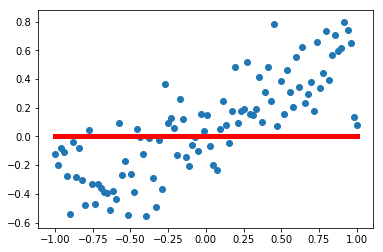

Starting gradient descent at b = 0, w = 0, error = 0.1244805459189302
Running...


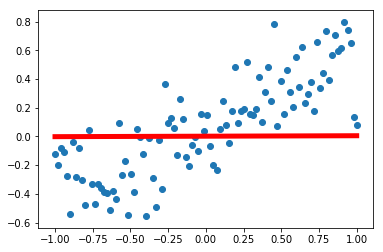

iteration 0, error is 0.1232


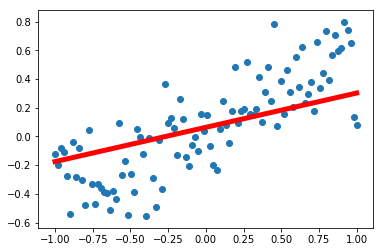

iteration 100, error is 0.0608


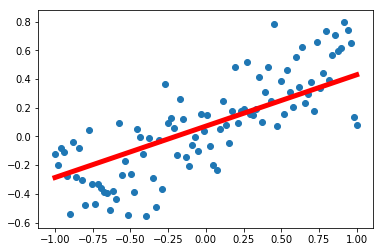

iteration 200, error is 0.0460


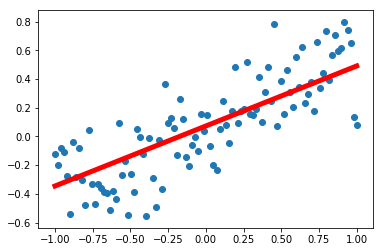

iteration 300, error is 0.0423


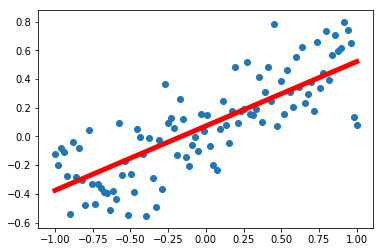

iteration 400, error is 0.0413


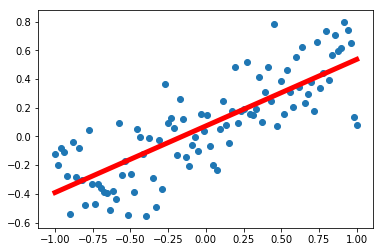

iteration 500, error is 0.0411


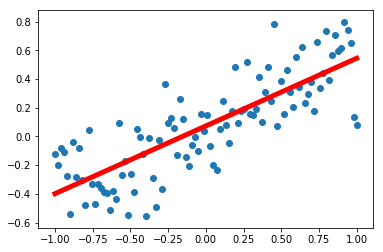

iteration 600, error is 0.0410


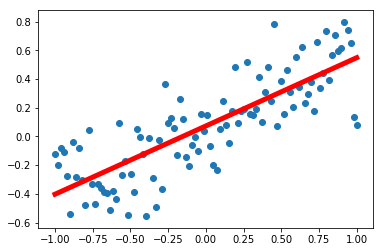

iteration 700, error is 0.0410


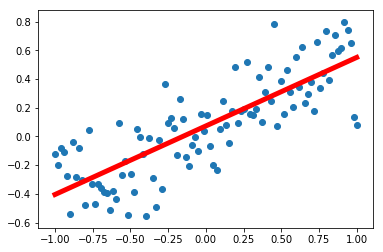

iteration 800, error is 0.0410


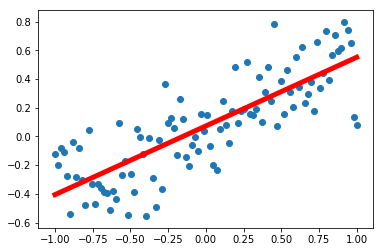

iteration 900, error is 0.0410


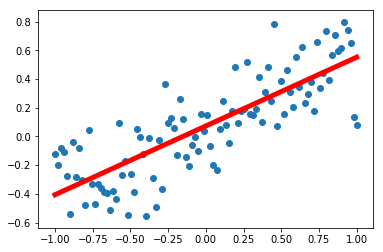

iteration 1000, error is 0.0410


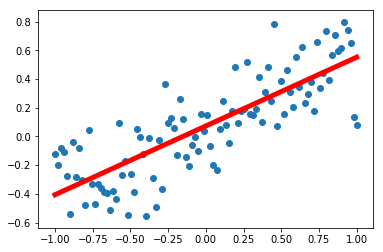

After 1001 iterations b = 0.07273745307815878, w = 0.47900574874578267, error = 0.04099392756652876


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# y = wx + b

def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (w * x + b)) ** 2
    plt.cla()
    plt.scatter(points[:, 0], points[:, 1])
    plt.plot(points[:, 0], w * points[:, 0] + b, 'r-', lw=5)
    plt.show()
    return totalError / float(len(points))

def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((w_current * x) + b_current))
        w_gradient += -(2/N) * x * (y - ((w_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
        if i % 100 == 0:
            print('iteration %d, error is %.4f' % (i, compute_error_for_line_given_points(b, w, points)))
    return [b, w]

def run():
    # points = np.genfromtxt("data.csv", delimiter=",")
    points = np.zeros((100, 2))
    points[:,0] = np.linspace(-1, 1, 100)
    points[:,1] = 0.5*points[:,0] + 0.1 + 0.2*np.random.randn(100)

    learning_rate = 0.01
    initial_b = 0 # initial y-intercept guess
    initial_w = 0 # initial slope guess
    num_iterations = 1001
    print("Starting gradient descent at b = {0}, w = {1}, error = {2}"
          .format(initial_b, initial_w,
                  compute_error_for_line_given_points(initial_b, initial_w, points))
          )
    print("Running...")
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, w = {2}, error = {3}".
          format(num_iterations, b, w,
                 compute_error_for_line_given_points(b, w, points))
          )

if __name__ == '__main__':
    run()

$$
\large y = w*x + b
$$

$\large loss = \frac{\sum_{i=1}^N(w*x_i + b - y_i)^2}{N}$

$\large \triangledown w = \frac{\sum 2*x_i*(w*x_i + b - y_i)}{N}$

$\large \triangledown b = \frac{\sum 2*(w*x_i + b - y_i)}{N}$